In [1]:
from pycaret.regression import *

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sale = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

def create_features(df):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    df['flag'] = pd.Series(np.where(df['date'] >= np.datetime64('2020-03-03'), 1, 0), index=df.index) #flag for COVID-19
    #df['rolling_mean_7'] = df['sale_dollars'].shift(7).rolling(window=7).mean()
    #df['lag_7'] = df['sale_dollars'].shift(7)
    #df['lag_15']=df['sale_dollars'].shift(15)
    #df['lag_last_year']=df['sale_dollars'].shift(52).rolling(window=15).mean()
  
    
    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','flag','sale_dollars']]
    X.index=df.index
    return X

In [4]:
sale['date'] = pd.to_datetime(sale['date'])
sale.drop('id', axis = 1, inplace = True)


In [5]:
sale = sale[sale['store_nbr'] == 44]
sale.reset_index()

,index,date,store_nbr,family,sales,onpromotion
0,1254,2013-01-01,44,AUTOMOTIVE,0.000,0
1,1255,2013-01-01,44,BABY CARE,0.000,0
2,1256,2013-01-01,44,BEAUTY,0.000,0
3,1257,2013-01-01,44,BEVERAGES,0.000,0
4,1258,2013-01-01,44,BOOKS,0.000,0
...,...,...,...,...,...,...
55567,3000388,2017-08-15,44,POULTRY,909.194,0
55568,3000389,2017-08-15,44,PREPARED FOODS,329.522,0
55569,3000390,2017-08-15,44,PRODUCE,7239.617,10
55570,3000391,2017-08-15,44,SCHOOL AND OFFICE SUPPLIES,345.000,12


In [6]:
fmily_codes = pd.DataFrame(sale['family'].unique())
fmily_codes

,0
0,AUTOMOTIVE
1,BABY CARE
2,BEAUTY
3,BEVERAGES
4,BOOKS
5,BREAD/BAKERY
6,CELEBRATION
7,CLEANING
8,DAIRY
9,DELI


In [7]:
sum_family = pd.DataFrame(sale.groupby('family')['sales'].sum().sort_values())
sum_family 

,sales
family,
BABY CARE,0.000000e+00
BOOKS,5.280000e+02
HOME APPLIANCES,3.216000e+03
HARDWARE,7.034000e+03
MAGAZINES,1.925000e+04
BEAUTY,1.962200e+04
LAWN AND GARDEN,2.182200e+04
SCHOOL AND OFFICE SUPPLIES,2.954300e+04
AUTOMOTIVE,3.178000e+04


In [8]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
sale['family'] = enc.fit_transform(sale['family'])
sale

,date,store_nbr,family,sales,onpromotion
1254,2013-01-01,44,0,0.000,0
1255,2013-01-01,44,1,0.000,0
1256,2013-01-01,44,2,0.000,0
1257,2013-01-01,44,3,0.000,0
1258,2013-01-01,44,4,0.000,0
...,...,...,...,...,...
3000388,2017-08-15,44,28,909.194,0
3000389,2017-08-15,44,29,329.522,0
3000390,2017-08-15,44,30,7239.617,10
3000391,2017-08-15,44,31,345.000,12


In [9]:
sale = sale.loc[sale['family'].isin([3])]
sale = sale.reset_index(drop = 'True')
sale

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,44,3,0.0,0
1,2013-01-02,44,3,5466.0,0
2,2013-01-03,44,3,3718.0,0
3,2013-01-04,44,3,4112.0,0
4,2013-01-05,44,3,6458.0,0
...,...,...,...,...,...
1679,2017-08-11,44,3,9517.0,15
1680,2017-08-12,44,3,9624.0,13
1681,2017-08-13,44,3,10491.0,13
1682,2017-08-14,44,3,7322.0,12


In [10]:
sale.sort_values(by = ['date', 'family'])
sale

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,44,3,0.0,0
1,2013-01-02,44,3,5466.0,0
2,2013-01-03,44,3,3718.0,0
3,2013-01-04,44,3,4112.0,0
4,2013-01-05,44,3,6458.0,0
...,...,...,...,...,...
1679,2017-08-11,44,3,9517.0,15
1680,2017-08-12,44,3,9624.0,13
1681,2017-08-13,44,3,10491.0,13
1682,2017-08-14,44,3,7322.0,12


In [11]:
import plotly.express as px

In [13]:
sale['mean_30']= sale['sales'].rolling(30).mean()
sale

,date,store_nbr,family,sales,onpromotion,mean_30
0,2013-01-01,44,3,0.0,0,NaN
1,2013-01-02,44,3,5466.0,0,NaN
2,2013-01-03,44,3,3718.0,0,NaN
3,2013-01-04,44,3,4112.0,0,NaN
4,2013-01-05,44,3,6458.0,0,NaN
...,...,...,...,...,...,...
1679,2017-08-11,44,3,9517.0,15,10595.300000
1680,2017-08-12,44,3,9624.0,13,10567.100000
1681,2017-08-13,44,3,10491.0,13,10592.566667
1682,2017-08-14,44,3,7322.0,12,10229.266667


In [17]:

fig = px.line(sale, x = 'date', y = ['sales', 'mean_30'], template = 'plotly_dark', title = 'distribution of sales with Moving Average')
fig.show()

Data Preparation

In [18]:
# extracting some features from sales
sale['store_nbr'] = ['store_'+str(44) for  i in sale['store_nbr']]
sale['family2'] = ['family_' + str(i) for i in sale['family']]
sale['time_series'] = sale[['store_nbr', 'family2']].apply(lambda x: '_'.join(x), axis = 1)
sale.drop(['store_nbr', 'family2', 'onpromotion'], axis = 1, inplace = True)

sale['month'] = [i.month for i in sale['date']]
sale['year'] = [i.year for i in sale['date']]
sale['day_of_week'] = [i.dayofweek for i in sale['date']]
sale['day_of_year'] = [i.dayofyear for i in sale['date']]


In [19]:
sale

,date,family,sales,mean_30,time_series,month,year,day_of_week,day_of_year
0,2013-01-01,3,0.0,NaN,store_44_family_3,1,2013,1,1
1,2013-01-02,3,5466.0,NaN,store_44_family_3,1,2013,2,2
2,2013-01-03,3,3718.0,NaN,store_44_family_3,1,2013,3,3
3,2013-01-04,3,4112.0,NaN,store_44_family_3,1,2013,4,4
4,2013-01-05,3,6458.0,NaN,store_44_family_3,1,2013,5,5
...,...,...,...,...,...,...,...,...,...
1679,2017-08-11,3,9517.0,10595.300000,store_44_family_3,8,2017,4,223
1680,2017-08-12,3,9624.0,10567.100000,store_44_family_3,8,2017,5,224
1681,2017-08-13,3,10491.0,10592.566667,store_44_family_3,8,2017,6,225
1682,2017-08-14,3,7322.0,10229.266667,store_44_family_3,8,2017,0,226


# model training loop

In [20]:
sale.drop(['family', 'mean_30'], axis = 1, inplace = True)

In [39]:
sale.reset_index()

,index,date,sales,time_series,month,year,day_of_week,day_of_year
0,0,2013-01-01,0.0,store_44_family_3,1,2013,1,1
1,1,2013-01-02,5466.0,store_44_family_3,1,2013,2,2
2,2,2013-01-03,3718.0,store_44_family_3,1,2013,3,3
3,3,2013-01-04,4112.0,store_44_family_3,1,2013,4,4
4,4,2013-01-05,6458.0,store_44_family_3,1,2013,5,5
...,...,...,...,...,...,...,...,...
1679,1679,2017-08-11,9517.0,store_44_family_3,8,2017,4,223
1680,1680,2017-08-12,9624.0,store_44_family_3,8,2017,5,224
1681,1681,2017-08-13,10491.0,store_44_family_3,8,2017,6,225
1682,1682,2017-08-14,7322.0,store_44_family_3,8,2017,0,226


In [40]:
sale.tail(100)

,date,sales,time_series,month,year,day_of_week,day_of_year
1584,2017-05-08,8862.0,store_44_family_3,5,2017,0,128
1585,2017-05-09,7362.0,store_44_family_3,5,2017,1,129
1586,2017-05-10,7713.0,store_44_family_3,5,2017,2,130
1587,2017-05-11,6281.0,store_44_family_3,5,2017,3,131
1588,2017-05-12,8841.0,store_44_family_3,5,2017,4,132
1589,2017-05-13,16742.0,store_44_family_3,5,2017,5,133
1590,2017-05-14,12164.0,store_44_family_3,5,2017,6,134
1591,2017-05-15,7871.0,store_44_family_3,5,2017,0,135
1592,2017-05-16,8479.0,store_44_family_3,5,2017,1,136
1593,2017-05-17,9571.0,store_44_family_3,5,2017,2,137


In [41]:
train = sale[sale['date']<= '2017-06-30']
test = sale[sale['date']> '2017-06-30']

In [45]:
train.reset_index()

,index,date,sales,time_series,month,year,day_of_week,day_of_year
0,0,2013-01-01,0.0,store_44_family_3,1,2013,1,1
1,1,2013-01-02,5466.0,store_44_family_3,1,2013,2,2
2,2,2013-01-03,3718.0,store_44_family_3,1,2013,3,3
3,3,2013-01-04,4112.0,store_44_family_3,1,2013,4,4
4,4,2013-01-05,6458.0,store_44_family_3,1,2013,5,5
...,...,...,...,...,...,...,...,...
1633,1633,2017-06-26,7714.0,store_44_family_3,6,2017,0,177
1634,1634,2017-06-27,7440.0,store_44_family_3,6,2017,1,178
1635,1635,2017-06-28,8096.0,store_44_family_3,6,2017,2,179
1636,1636,2017-06-29,6528.0,store_44_family_3,6,2017,3,180


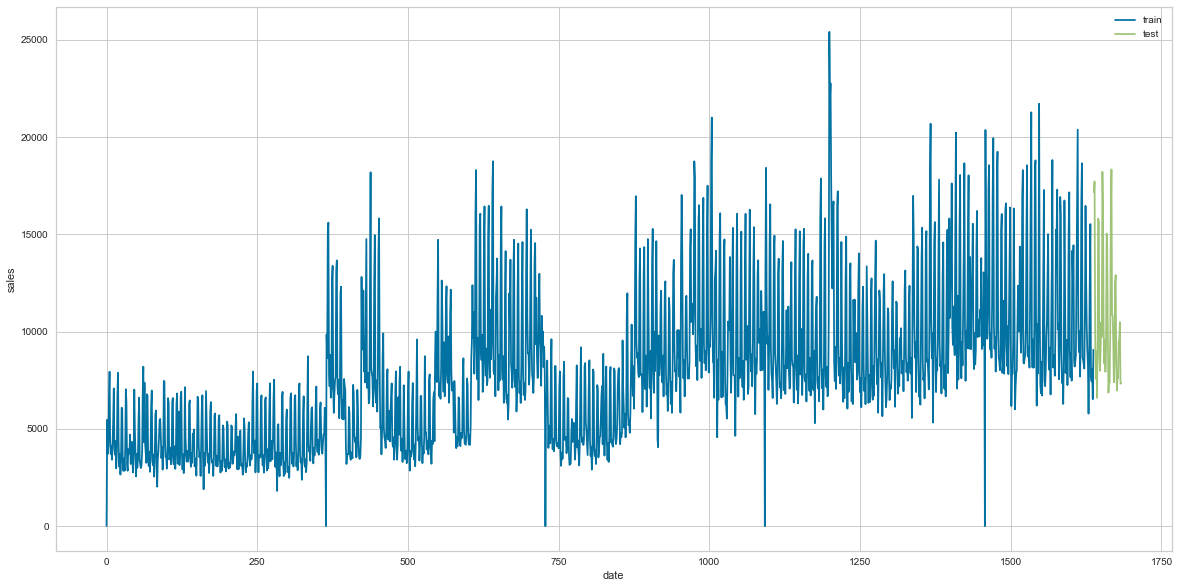

In [48]:
plt.figure(figsize=(20,10))
plt.xlabel('date')
plt.ylabel('sales')
plt.plot(train.index,train['sales'],label='train')
plt.plot(test.index,test['sales'],label='test')
plt.legend()
plt.show()

In [50]:
reg = setup(data = train, 
             target = 'sales',
             numeric_imputation = 'mean',
             categorical_features = ['day_of_week','month','year','day_of_year'], 
             transformation = True, transform_target = True, 
             combine_rare_levels = True, rare_level_threshold = 0.1,
             remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
             silent = True)

,Description,Value
0,session_id,4901
1,Target,sales
2,Original Data,"(1638, 7)"
3,Missing Values,0
4,Numeric Features,0
5,Categorical Features,5
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(1146, 289)"


In [ ]:
# returns best models - takes a little time to run
top3 = compare_models(n_select = 3)

In [19]:
%%time
from tqdm import tqdm

ts = sale['time_series'].unique()

results = []
final_model = {}

for i in tqdm(ts):
    
    df_subset = sale[sale['time_series'] == i]
    
    s = setup(df_subset, target = 'sales', session_id = 123, train_size = 0.95,
             data_split_shuffle = False, fold_strategy = 'timeseries', fold = 3,
             ignore_features = ['date', 'time_series'],
             numeric_features = ['day_of_year', 'year'],
             categorical_features = ['month', 'day_of_week'],
             silent = True, verbose = False,
             log_experiment = True, experiment_name = i, log_plots = True)
    
    best_model = compare_models(sort = 'MAE', verbose = False)
    
    p = pull().iloc[0:1]
    p['time_series'] = str(i)
    results.append(p)
    
    f = finalize_model(best_model)
    final_model[i] = f
    
    save_model(f, model_name = 'trained_models' + str(i), verbose = True)

 33%|████████████████████████████                                                        | 1/3 [00:33<01:06, 33.14s/it]

Transformation Pipeline and Model Successfully Saved


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:54<00:26, 26.05s/it]

Transformation Pipeline and Model Successfully Saved


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:17<00:00, 25.79s/it]

Transformation Pipeline and Model Successfully Saved
CPU times: total: 51.5 s
Wall time: 1min 17s


In [20]:
concat_results = pd.concat(results, axis = 0)
concat_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec),time_series
ada,AdaBoost Regressor,2151.7833,8.777878e+06,2951.1471,0.2567,0.4849,0.2417,0.0467,store_44_family_3
lr,Linear Regression,1503.0452,5.988222e+06,2435.1261,0.4850,0.5054,0.1416,0.0100,store_44_family_12
rf,Random Forest Regressor,3835.3958,3.340997e+07,5200.2756,-0.2674,2.7183,52.9475,0.1433,store_44_family_30


# predicting future data points

In [21]:
test_df['date'] = pd.to_datetime(test_df['date'])
test_df.drop(['id', 'onpromotion'], axis = 1, inplace = True)

In [22]:
test_df

,date,store_nbr,family
0,2017-08-16,1,AUTOMOTIVE
1,2017-08-16,1,BABY CARE
2,2017-08-16,1,BEAUTY
3,2017-08-16,1,BEVERAGES
4,2017-08-16,1,BOOKS
...,...,...,...
28507,2017-08-31,9,POULTRY
28508,2017-08-31,9,PREPARED FOODS
28509,2017-08-31,9,PRODUCE
28510,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES


In [23]:
test_df = test_df[test_df['store_nbr'] == 44]
test_df.reset_index(drop = True)

,date,store_nbr,family
0,2017-08-16,44,AUTOMOTIVE
1,2017-08-16,44,BABY CARE
2,2017-08-16,44,BEAUTY
3,2017-08-16,44,BEVERAGES
4,2017-08-16,44,BOOKS
...,...,...,...
523,2017-08-31,44,POULTRY
524,2017-08-31,44,PREPARED FOODS
525,2017-08-31,44,PRODUCE
526,2017-08-31,44,SCHOOL AND OFFICE SUPPLIES


In [24]:
from sklearn.preprocessing import LabelEncoder
enc1 = LabelEncoder()
test_df['family'] = enc1.fit_transform(test_df['family'])

In [25]:
# defining features

test_df['store_nbr'] = ['store_'+str(44) for  i in test_df['store_nbr']]
test_df['family2'] = ['family_' + str(i) for i in test_df['family']]
test_df['time_series'] = test_df[['store_nbr', 'family2']].apply(lambda x: '_'.join(x), axis = 1)
test_df.drop(['store_nbr', 'family2'], axis = 1, inplace = True)


test_df['month'] = [i.month for i in test_df['date']]
test_df['year'] = [i.year for i in test_df['date']]
test_df['day_of_week'] = [i.dayofweek for i in test_df['date']]
test_df['day_of_year'] = [i.dayofyear for i in test_df['date']]

test_df

,date,family,time_series,month,year,day_of_week,day_of_year
1254,2017-08-16,0,store_44_family_0,8,2017,2,228
1255,2017-08-16,1,store_44_family_1,8,2017,2,228
1256,2017-08-16,2,store_44_family_2,8,2017,2,228
1257,2017-08-16,3,store_44_family_3,8,2017,2,228
1258,2017-08-16,4,store_44_family_4,8,2017,2,228
...,...,...,...,...,...,...,...
28012,2017-08-31,28,store_44_family_28,8,2017,3,243
28013,2017-08-31,29,store_44_family_29,8,2017,3,243
28014,2017-08-31,30,store_44_family_30,8,2017,3,243
28015,2017-08-31,31,store_44_family_31,8,2017,3,243


In [27]:
test_df = test_df.loc[ test_df['family'].isin([12, 3, 30]) ]

test_df.sort_values(by = ['date','time_series'])

,date,family,time_series,month,year,day_of_week,day_of_year
1266,2017-08-16,12,store_44_family_12,8,2017,2,228
1257,2017-08-16,3,store_44_family_3,8,2017,2,228
1284,2017-08-16,30,store_44_family_30,8,2017,2,228
3048,2017-08-17,12,store_44_family_12,8,2017,3,229
3039,2017-08-17,3,store_44_family_3,8,2017,3,229
3066,2017-08-17,30,store_44_family_30,8,2017,3,229
4830,2017-08-18,12,store_44_family_12,8,2017,4,230
4821,2017-08-18,3,store_44_family_3,8,2017,4,230
4848,2017-08-18,30,store_44_family_30,8,2017,4,230
6612,2017-08-19,12,store_44_family_12,8,2017,5,231


In [28]:
test_df = test_df.reset_index(drop = 'True')

In [29]:
test_df.drop(['family'], axis = 1, inplace = True)
test_df

,date,time_series,month,year,day_of_week,day_of_year
28,2017-08-16,store_44_family_12,8,2017,2,228
13,2017-08-16,store_44_family_3,8,2017,2,228
32,2017-08-16,store_44_family_30,8,2017,2,228
23,2017-08-17,store_44_family_12,8,2017,3,229
10,2017-08-17,store_44_family_3,8,2017,3,229
44,2017-08-17,store_44_family_30,8,2017,3,229
25,2017-08-18,store_44_family_12,8,2017,4,230
2,2017-08-18,store_44_family_3,8,2017,4,230
37,2017-08-18,store_44_family_30,8,2017,4,230
24,2017-08-19,store_44_family_12,8,2017,5,231


In [42]:
sale['time_series'].unique()

array(['store_44_family_3', 'store_44_family_12', 'store_44_family_30'],
      dtype=object)

In [30]:
from pycaret.regression import load_model, predict_model

all_test = []
loaded_models = {}

for i in tqdm(sale['time_series'].unique()):
    l = load_model('trained_models' + str(i), verbose = False)
    loaded_models[i] = l
    p = predict_model(l, data = test_df)
    p['time_series'] = i
    all_test.append(p)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.54it/s]


In [31]:
concat_test = pd.concat(all_test, axis = 0)
concat_test.sort_values(by =['date', 'time_series'])

,date,time_series,month,year,day_of_week,day_of_year,Label
13,2017-08-16,store_44_family_12,8,2017,2,228,10022.625000
28,2017-08-16,store_44_family_12,8,2017,2,228,10022.625000
32,2017-08-16,store_44_family_12,8,2017,2,228,10022.625000
13,2017-08-16,store_44_family_3,8,2017,2,228,11292.477492
28,2017-08-16,store_44_family_3,8,2017,2,228,11292.477492
...,...,...,...,...,...,...,...
17,2017-08-31,store_44_family_3,8,2017,3,243,10543.867059
46,2017-08-31,store_44_family_3,8,2017,3,243,10543.867059
15,2017-08-31,store_44_family_30,8,2017,3,243,6695.056562
17,2017-08-31,store_44_family_30,8,2017,3,243,6695.056562


In [62]:
sale_df = sale[(sale['date'] > '2016-08-15') & (sale['date'] <= '2016-08-31')]
sale_df.head()

,date,sales,time_series,month,year,day_of_week,day_of_year
3960,2016-08-16,8492.000,store_44_family_3,8,2016,1,229
3961,2016-08-16,8918.000,store_44_family_12,8,2016,1,229
3962,2016-08-16,8626.612,store_44_family_30,8,2016,1,229
3963,2016-08-17,8443.000,store_44_family_3,8,2016,2,230
3964,2016-08-17,9034.000,store_44_family_12,8,2016,2,230


In [63]:
fdf = pd.concat([sale_df, concat_test])
fdf

,date,sales,time_series,month,year,day_of_week,day_of_year,Label
3960,2016-08-16,8492.000,store_44_family_3,8,2016,1,229,NaN
3961,2016-08-16,8918.000,store_44_family_12,8,2016,1,229,NaN
3962,2016-08-16,8626.612,store_44_family_30,8,2016,1,229,NaN
3963,2016-08-17,8443.000,store_44_family_3,8,2016,2,230,NaN
3964,2016-08-17,9034.000,store_44_family_12,8,2016,2,230,NaN
...,...,...,...,...,...,...,...,...
43,2017-08-26,NaN,store_44_family_30,8,2017,5,238,10317.634199
44,2017-08-17,NaN,store_44_family_30,8,2017,3,229,6654.637944
45,2017-08-19,NaN,store_44_family_30,8,2017,5,231,10121.216387
46,2017-08-31,NaN,store_44_family_30,8,2017,3,243,6695.056562


In [64]:
fdf.set_index('date', drop= True, inplace = True)

In [65]:
all_sub = []

for i in fdf['time_series'].unique():
    subs= fdf[fdf['time_series'] == i]
    subs = subs[['Label', 'sales']]
    subs = subs.resample('D').sum()
    subs['time_series'] = i
    all_sub.append(subs)
    
    
cresults = pd.concat(all_sub, axis = 0)
cresults['sales'] = cresults['sales'].replace(0, np.nan)

cresults.head()

,Label,sales,time_series
date,,,
2016-08-16,0.0,8492.0,store_44_family_3
2016-08-17,0.0,8443.0,store_44_family_3
2016-08-18,0.0,6937.0,store_44_family_3
2016-08-19,0.0,8691.0,store_44_family_3
2016-08-20,0.0,12217.0,store_44_family_3


In [66]:
for i in cresults['time_series'].unique():
    subs_df = cresults[cresults['time_series'] == i]
    
    fig = px.line(subs_df, x = subs_df.index, y = ['sales', 'Label'], title = i, template = 'plotly_dark')
    fig.show()

In [38]:
final_df = pd.merge(concat_test, sale, how = 'left', left_on = ['date', 'time_series'], right_on = ['date', 'time_series'])
final_df

,date,time_series,month_x,year_x,day_of_week_x,day_of_year_x,Label,sales,month_y,year_y,day_of_week_y,day_of_year_y
0,2017-08-29,store_44_family_3,8,2017,1,241,10978.359043,NaN,NaN,NaN,NaN,NaN
1,2017-08-28,store_44_family_3,8,2017,0,240,11453.930233,NaN,NaN,NaN,NaN,NaN
2,2017-08-18,store_44_family_3,8,2017,4,230,10978.359043,NaN,NaN,NaN,NaN,NaN
3,2017-08-20,store_44_family_3,8,2017,6,232,14300.800699,NaN,NaN,NaN,NaN,NaN
4,2017-08-27,store_44_family_3,8,2017,6,239,14300.800699,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
139,2017-08-26,store_44_family_30,8,2017,5,238,10317.634199,NaN,NaN,NaN,NaN,NaN
140,2017-08-17,store_44_family_30,8,2017,3,229,6654.637944,NaN,NaN,NaN,NaN,NaN
141,2017-08-19,store_44_family_30,8,2017,5,231,10121.216387,NaN,NaN,NaN,NaN,NaN
142,2017-08-31,store_44_family_30,8,2017,3,243,6695.056562,NaN,NaN,NaN,NaN,NaN


In [39]:
final_df.set_index('date', drop= True, inplace = True)

In [69]:
all_subs = []

for i in final_df['time_series'].unique():
    sub = final_df[final_df['time_series'] == i]
    sub = sub[['Label', 'sales']]
    sub['time_series'] = i
    all_subs.append(sub)
    
    
concat_sub = pd.concat(all_subs, axis = 0)
concat_sub['sales'] = concat_sub['sales'].replace(0, np.nan)

concat_sub

,Label,sales,time_series
date,,,
2017-08-29,10978.359043,NaN,store_44_family_3
2017-08-28,11453.930233,NaN,store_44_family_3
2017-08-18,10978.359043,NaN,store_44_family_3
2017-08-20,14300.800699,NaN,store_44_family_3
2017-08-27,14300.800699,NaN,store_44_family_3
...,...,...,...
2017-08-26,10317.634199,NaN,store_44_family_30
2017-08-17,6654.637944,NaN,store_44_family_30
2017-08-19,10121.216387,NaN,store_44_family_30


In [73]:
for i in concat_sub['time_series'].unique():
    sub_df = concat_sub[concat_sub['time_series'] == i]
    
    fig = px.scatter(sub_df, x = sub_df.index, y = ['Label'], title = i, template = 'plotly_dark')
    fig.show()

In [67]:
 for i in sale['time_series'].unique():
        subset = sale[sale['time_series'] == i]
        subset['moving_average']= subset['sales'].rolling(30).mean()
        fig = px.line(subset, x = 'date', y = ['sales', 'moving_average'], title = i, template = 'plotly_dark')
        fig.show()

# ML Oops

In [75]:
pip install mlflow

In [76]:
!mlflow ui

^C
